### Rotující kruhová stěna

##### Základní vztahy

Radiální a tečné napětí (obojí jsou hlavní napětí),

\begin{eqnarray}
  \sigma_r(r)&=&A-\frac{B}{r^2}-\frac{3+\mu}{8}\rho r^2\omega^2, \\
  \sigma_t(r)&=&A+\frac{B}{r^2}-\frac{1+3\mu}{8}\rho r^2\omega^2,
\end{eqnarray}

kde $\mu$ je Poissonovo číslo, $\rho$ hustota a $\omega$ úhlová rychlost. Napětí $\sigma_z(x)$ zanedbáme za předpokladu $h<r$. Pro posuvy v radiálním směru platí,

\begin{equation}
  u(r)=\frac{1-\mu}{E}Ar+\frac{1+\mu}{E}\frac{B}{r}-\frac{1-\mu^2}{8E}\rho r^3\omega^2,
\end{equation}

kde $E$ je *Youngův* modul pružnosti v tahu.

In [1]:
%matplotlib inline
import sympy as sp
from numpy import linspace
from math import pi
import matplotlib.pyplot as plt
from IPython.core.display import Image
sp.init_printing()

##### Př.2

Stanovte otáčky, při kterých dojde k oddělení obou součástí. Součásti jsou na sebe nalisovány s přesahem $\Delta$.

$n=?\,\mathrm{min}^{-1}$,

$r_2^1=r_1^2=r_1=50\,\mathrm{mm}$, $r_2^2=r_2=200\,\mathrm{mm}$,

$\mu=0.3$, $\rho=7800\,\mathrm{kg}\times\mathrm{m}^3$,

$E=2.1\times 10^5\,\mathrm{MPa}$,

$\Delta=3.0\times 10^{-1}\,\mathrm{mm}$.

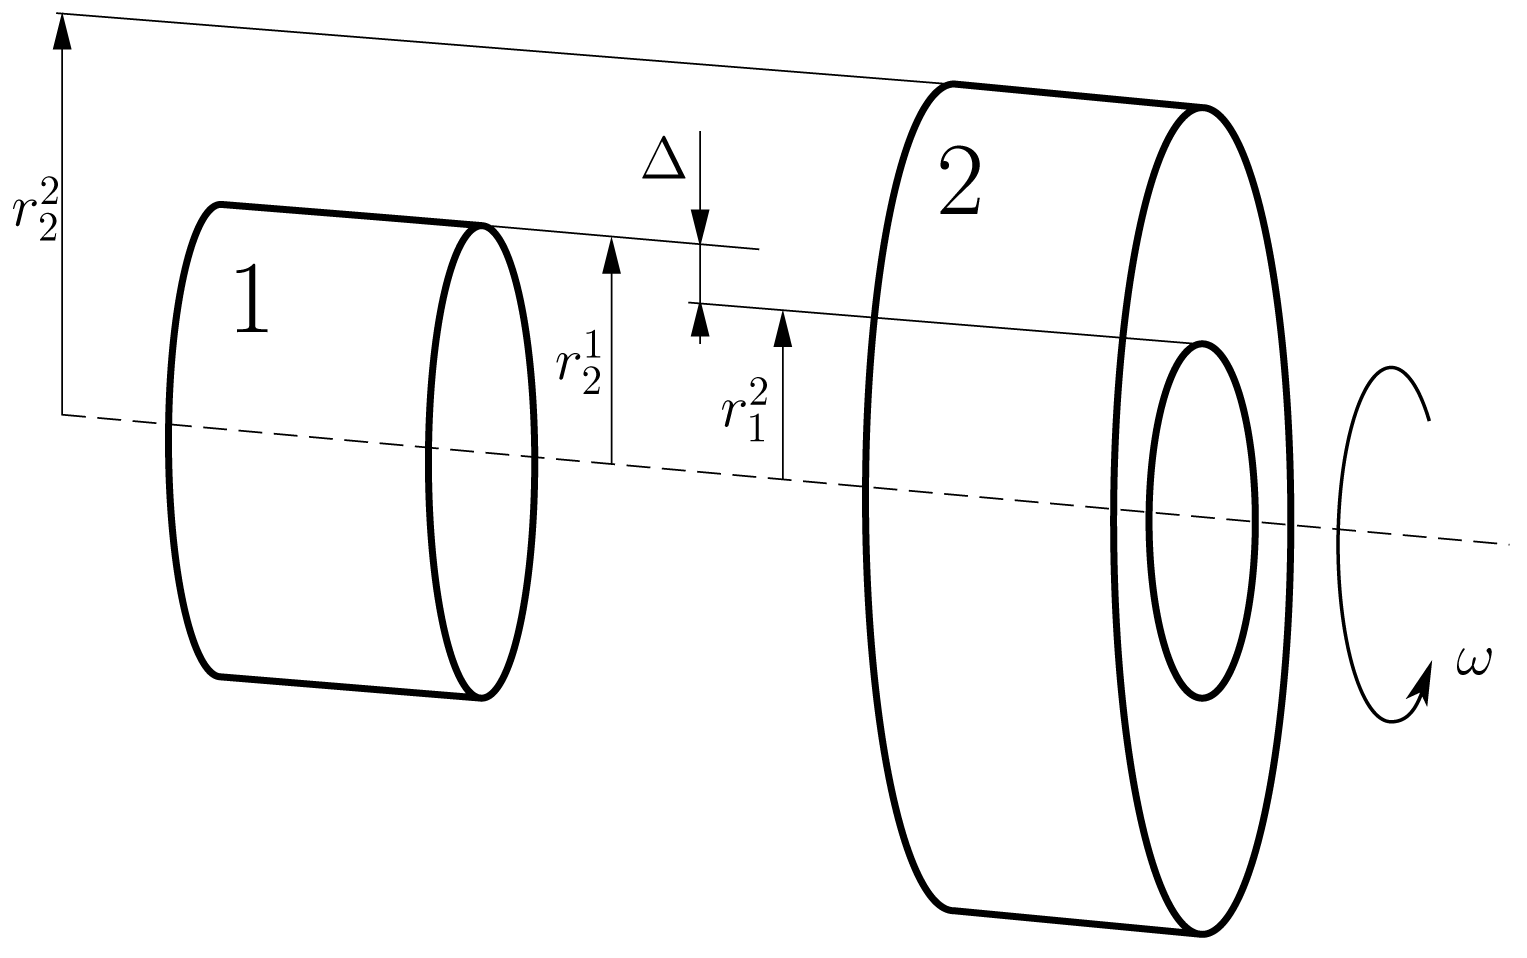

In [2]:
Image(filename='rotujici_stena2.png',width=500)

Zavedení potřebných konstant,

In [3]:
A1=sp.symbols('A1')
A2,B2=sp.symbols('A2 B2')
r12,r21,r22=sp.symbols('r12 r21 r22')
r,omega=sp.symbols('r omega')
E,mu,rho=sp.symbols('E mu rho')

Vztahy pro napětí $\sigma_r$, $\sigma_t$ a posuvy $u$ pro těleso 1 a 2,

In [4]:
sigma_1r=A1-(3+mu)/8*rho*r**2*omega**2
sigma_1t=A1-(1+3*mu)/8*rho*r**2*omega**2
u_1=(1-mu)/E*A1*r-(1-mu**2)/(8*E)*rho*r**3*omega**2
sigma_1r,sigma_1t,u_1

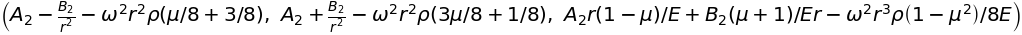

In [5]:
sigma_2r=A2-B2/r**2-(3+mu)/8*rho*r**2*omega**2
sigma_2t=A2+B2/r**2-(1+3*mu)/8*rho*r**2*omega**2
u_2=(1-mu)/E*A2*r+(1+mu)/E*B2/r-(1-mu**2)/(8*E)*rho*r**3*omega**2
sigma_2r,sigma_2t,u_2

Při rozpojení obou součástí zmízí tlak na vnitřním stěně kotouče 2 a vnější stěně kotuče 1. Odtud plynou následující okrajové podmínky,

\begin{eqnarray}
  \sigma_r^1=0\quad&\mathrm{pro}&\,r=r_2^1, \\
  \sigma_r^2=0\quad&\mathrm{pro}&\,r=r_1^2, \\
  \sigma_r^2=0\quad&\mathrm{pro}&\,r=r_2^2
\end{eqnarray}

a z nich vyplývající soustava algebraických rovnic pro neznámé $A_1$, $A_2$ a $B_2$.  

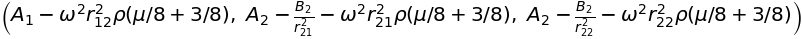

In [6]:
bc1=sigma_1r.subs({r:r12})
bc2=sigma_2r.subs({r:r21})
bc3=sigma_2r.subs({r:r22})
bc1,bc2,bc3

Řešení předchozí soustavy,

In [7]:
sol1=sp.linsolve([bc1,bc2,bc3],[A1,A2,B2])
sol1

Dosazením zadaných hodnot do řešení pro $A_1$, $A_2$ a $B_2$ zůstane jedna neznámá $\omega$,

In [8]:
E_=2.1e11
delta_=3e-4
r1_=50e-3
r2_=200e-3
mu_=0.3
rho_=7800

In [9]:
A1_=sol1.args[0][0].subs({r12:r1_,rho:rho_,mu:mu_})
A2_=sol1.args[0][1].subs({r21:r1_,r22:r2_,rho:rho_,mu:mu_})
B2_=sol1.args[0][2].subs({r21:r1_,r22:r2_,rho:rho_,mu:mu_})
A1_,A2_,B2_

$\omega$ se vyjádří dodatečně z deformačních podmínek obou těles při jejich "rozpojení", nejdříve se tedy vyjádří posuvy obou těles $u_1(r)$ a $u_2(r)$ v závislosti na $r$,

In [10]:
u_1o=u_1.subs({A1:A1_,mu:mu_,rho:rho_,E:E_})
u_2o=u_2.subs({A2:A2_,B2:B2_,mu:mu_,rho:rho_,E:E_})
u_1o,u_2o

Deformační podmínka při rozložení obou těles je

\begin{equation}
  |u_2(r_2^1)|-|u_1(r_1^2)|=\Delta.
\end{equation}

In [11]:
bc4=abs(u_2o.subs(r,r1_))-abs(u_1o.subs(r,r1_))-delta_
bc4

Z důvodů absolutních hodnot v předepsané podmínce, se nabídne víc řešení, která samozřejmě nedávají z mechanického hlediska smysl, proto se vybere jen to spravné - reálné a kladné,

In [12]:
sol2=sp.solveset(bc4,omega,sp.S.Reals)
sol2

které se snadno přepočítá na otáčky,

\begin{equation}
  n=\frac{60\omega}{2\pi}.\quad[\mathrm{min}^{-1}]
\end{equation}

In [13]:
n=60*sol2.args[1]/(2*pi)
n